In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

/Users/damien/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from sklearn import datasets

iris_dataset = datasets.load_iris()

Let's start by looking at two different classifiers for the iris dataset, just to get used to what we wamt.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, label_train, label_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.3, random_state=41)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, label_train)
print("The score for KNN is")
print("Training: {:6.4f}%".format(100*knn.score(X_train, label_train)))
print("Test set: {:6.4f}%".format(100*knn.score(X_test, label_test)))

The score for KNN is
Training: 100.0000%
Test set: 93.3333%


In [5]:
lm = LogisticRegression(C = 0.95)
lm.fit(X_train, label_train)
print("The score for Logistic regression is")
print("Training: {:6.4f}%".format(100*lm.score(X_train, label_train)))
print("Test set: {:6.4f}%".format(100*lm.score(X_test, label_test)))

The score for Logistic regression is
Training: 97.1429%
Test set: 88.8889%


Unlike kNN, the logistic regression model has a probabiltiy method built into it.

We probably want to penalize a prediction that we claim we are really sure about more than one that was just barely over 33%.

In [6]:
lm.predict_proba(X_test)

array([[  1.47949079e-03,   4.62473365e-01,   5.36047144e-01],
       [  7.01069755e-04,   2.96640121e-01,   7.02658809e-01],
       [  4.43650165e-04,   3.73953539e-01,   6.25602811e-01],
       [  2.52873279e-02,   5.33232236e-01,   4.41480436e-01],
       [  1.49634307e-03,   3.16047331e-01,   6.82456326e-01],
       [  8.15802060e-02,   7.58697510e-01,   1.59722284e-01],
       [  4.06249725e-03,   4.15502004e-01,   5.80435499e-01],
       [  5.85460202e-02,   3.72817900e-01,   5.68636080e-01],
       [  3.00041408e-03,   3.12609298e-01,   6.84390288e-01],
       [  6.90164952e-04,   2.28182366e-01,   7.71127469e-01],
       [  6.51058402e-03,   3.15224157e-01,   6.78265259e-01],
       [  8.67766770e-01,   1.32141720e-01,   9.15101354e-05],
       [  8.42537333e-01,   1.57185786e-01,   2.76881298e-04],
       [  1.20764193e-01,   7.24789678e-01,   1.54446129e-01],
       [  8.62519904e-01,   1.37191768e-01,   2.88328407e-04],
       [  4.22536206e-03,   4.41015773e-01,   5.5475886

Let's look at the type of errors that these two classifiers made:

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label_test, knn.predict(X_test))

array([[11,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 15]])

i.e. the kNN confused two samples of species 1 as species 2, and one species 2 as a species 1, but managed to get all of the species 0 irises right. 

Note that `confusion[row_number][col_number]` tells us how many of the labels that were actually `row_number` were predicted to be `col_number` by our classifier. We can see that by making predictions that are "all class 2"

In [8]:
# What happens when our "prediction" is all class 2?
confusion_matrix(label_test, [2]*len(label_test))

array([[ 0,  0, 11],
       [ 0,  0, 18],
       [ 0,  0, 16]])

We can make this a little prettier by passing confusion matrix to `sns.heatmap`:

/Users/damien/miniconda2/lib/python2.7/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/damien/miniconda2/lib/python2.7/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


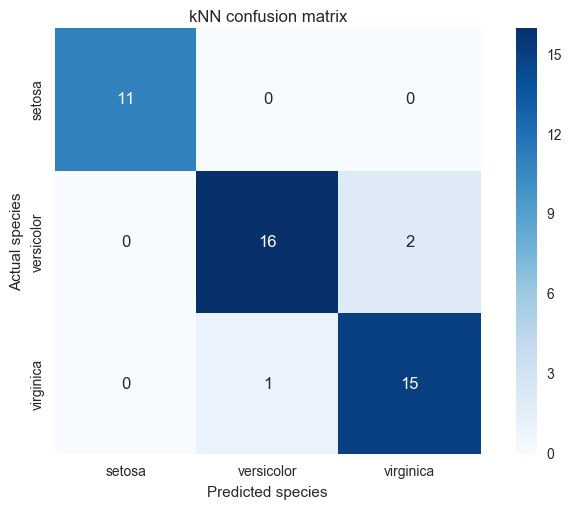

In [9]:
import seaborn as sns

knn_confusion = confusion_matrix(label_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=iris_dataset['target_names'],
           yticklabels=iris_dataset['target_names'])

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('kNN confusion matrix');

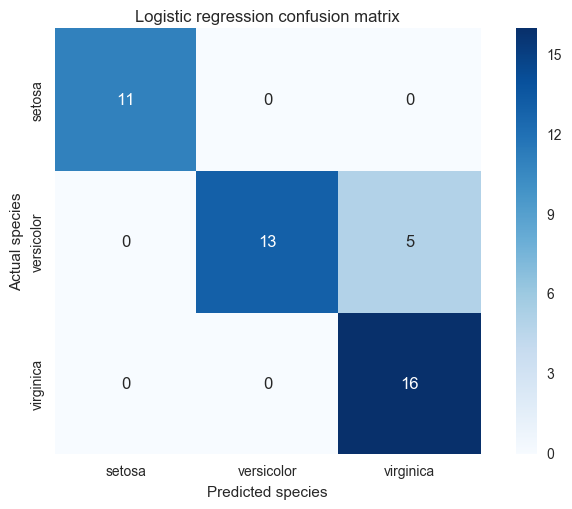

In [10]:
# For logistic regression:
lm_confusion = confusion_matrix(label_test, lm.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(lm_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=iris_dataset['target_names'],
           yticklabels=iris_dataset['target_names'])

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Logistic regression confusion matrix');

## Binary classification

Binary classification has two outcomes, which are usually labelled as the "positive" class (the one that we are trying to detect) and a "negative class" (the normal case). For example

| Test | + class | - class |
| --- | --- | --- |
| Drug test | Has taken the drug | Hasn't taken the drug |
| Breath test | BAC is over legal limit | BAC is not over legal limit |
| Pregnancy test | Is pregnant | Isn't pregnant | 
| Background check | Is a threat | Is not a threat |
| Water Diviner | Found water | Did not find water | 
| Gold panner | Found gold | Did not find gold | 
| Explosive detector | Is a bomb | Isn't a bomb |
| A not-bomb detector | Isn't a bomb | Is a bomb |

We are going to look at an example of credit card data, where the positive class is "transaction is fraudulant" and the negative class is "transaction is not fraudulant".

### Reminder of key terms:

| | Test positive | Test negative |
|--- | --- | --- |
| **Actually positive ** | True positive | False negative (Type II error) |
| **Actually negative ** | False positive (Type I error) | True negative |

i.e. a false positive is a transaction we flag as fraudulant that is actually legitimite, whereas a false negative is a transaction we claim is legitimate that turns out to be fraudulant.

In [12]:
# Let's read in some credit card data!
df = pd.read_csv('./data/creditcard.csv.gz')

Let's look at the distribution of fraud to non-fraud cases

In [13]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Wow! If we just guess class 0 (non-fraud transactions) we will get the right answer 284315/(284315 + 492) = 99.8% of the time! If accuracy is the metric, we have a very simple model that does very well:

**Model 0:** guess all transactions are legitimate (accuracy 99.8%)

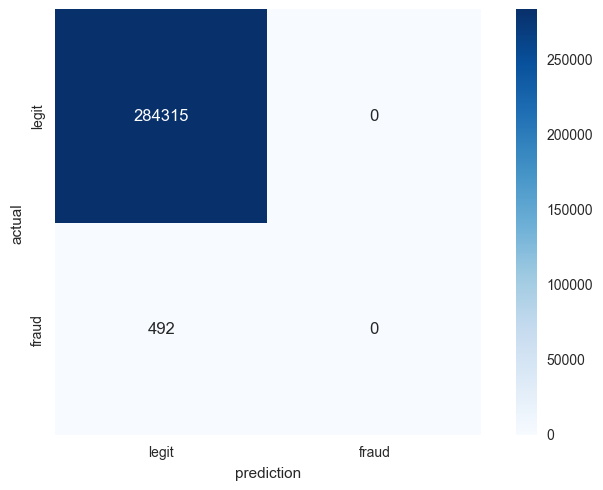

In [14]:
fraud_confusion = confusion_matrix([0]*284315 + [1]*492, [0]*len(df))
plt.figure(dpi=100)
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
plt.xlabel('prediction')
plt.ylabel('actual')

In [15]:
# Let's make a slightly better model
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], df.iloc[:, -1])
lm = LogisticRegression(C = 1.3)
lm.fit(X_train, y_train)
lm.score(X_train,y_train)

0.99919009386484403

In [51]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

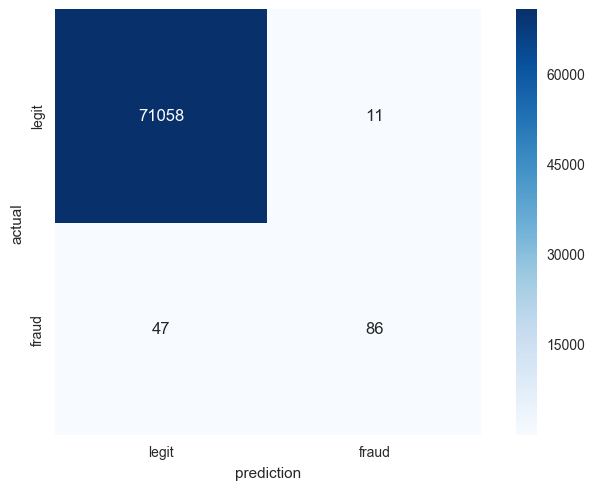

In [52]:
make_confusion_matrix(lm)

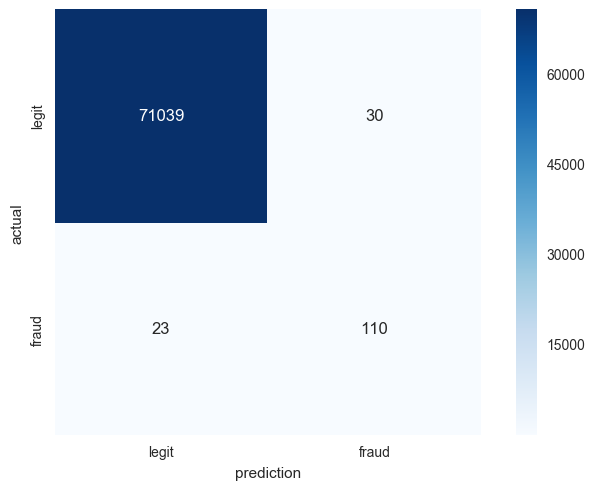

In [55]:
from ipywidgets import interactive

interactive(lambda threshold: make_confusion_matrix(lm, threshold), threshold=(0.0,1.0,0.02))

By reducing the threshold to 6% (i.e. our model only gives a 6% chance the transaction is fradulent), we have halved the number of people that got away with fraudulent charges [from 47 to 23]. We had to pay for this by increasing the number of good customers that we inconvienced [from 11 to 30].

We can introduce two new metrics:
- **Precision:** The fraction of postive predictions you made that were correct. 
  High precision means that if your model predicted a positive case, you believe it with high confidence. It doesn't tell us how many postive cases we missed (i.e. it doesn't tell us how sure we are about the cases we predicted were negative).
- **Recall**: The fraction of positive cases you predicted correctly.
  High recall means that you are confident that you didn't miss any positive cases. 
  
The easiest way to get high precision is to call a point "positive" only when you are very sure. The easiest way to get 100% recall is to predict all points to be positive, as you are guaranteed to label 100% of all positive cases. You should not optimize for either recall or precision -- you need to think about how to balance them against one another.

In formula:
$$ \text{Precision} = \frac{\text{(True positives)}}{\text{Predicted positives}} = \frac{\text{True positives}}{\text{True positives} + \text{False postitives}}$$
and
$$ \text{Recall} = \frac{\text{True positives}}{\text{Actual positives}} = \frac{\text{True positives}}{\text{True positives} + \text{False negatives}}$$

### Example calcuation: fraud when threshold = 0.5 

| | predicted negative (legit) | predicted positive (fraud) | Total |
|---| --- | --- | --- |
| **actual negative (legit)** | 71058 | 11 | 71069 |
| **actual positive (fraud)** | 47 | 86 | 133 |
| **Total** | 71105 | 97 | 71202|


For precision:
$$\text{Precision} = \frac{TP}{\text{predicted positive}} = \frac{86}{86 + 11} = 0.887$$
i.e. this 88.7% of the tests positive predictions are correct.

For recall:
$$\text{Recall} = \frac{TP}{\text{actual positives}} = \frac{86}{86+47} = 0.647$$
i.e. the model can only get (or 'remember'/'recall') 64.7% of fraudulent transactions.


### Example calculation: fraud when threshold = 0.06

| | predicted negative (legit) | predicted positive (fraud) | Total |
|---| --- | --- | --- |
| **actual negative (legit)** | 71039 | 30 | 71069 |
| **actual positive (fraud)** | 23 | 110 | 133 |
| **Total** | 71062 | 140 | 71202|

Calculating precision and recall:
* Precision = 110 / 140 = 78.5%
* Recall = 110 / 133 = 82.7%
i.e. by lowering the probability threshold before we label a transaction fraud, we caught more fraud (high recall), but we also investigated more innocent transactions (lower precision).

## Big takeaways:

* Using the **same** logistic regression model, we can change the threshold to bias toward more precision (making positives from test more relevant) or recall (increasing the fraction of postives found).
* Precision goes down as you decrease the threshold, while recall goes up. This is called the _precision-recall tradeoff_.
* Which is worse, low recall or low precision? Depends on the cost of making the different types of error.
* We just need the final predictions of the model to calculate precision and recall. We can get sklearn.metrics to calculate them for us

In [65]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

# using the default threshold of 0.5, which is what "vanilla" predict does
y_predict = lm.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.8866,   Recall: 0.6466


In [66]:
# using the default threshold of 0.06
y_predict = (lm.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.7857,   Recall: 0.8271


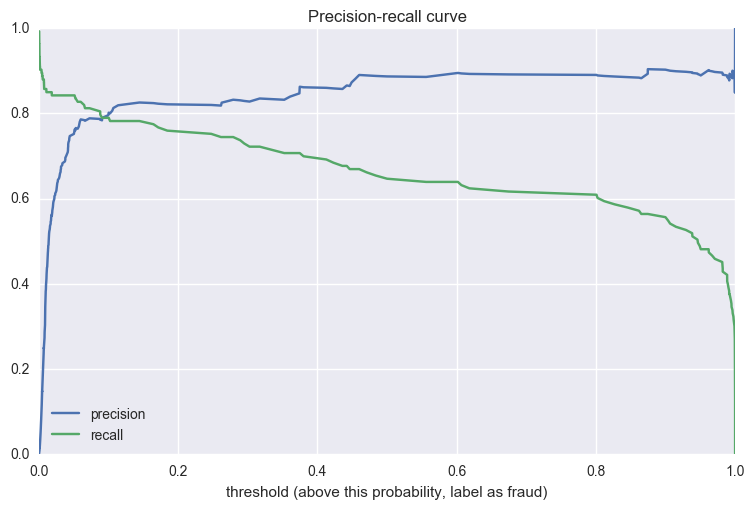

In [83]:
# We can also use the probabilities / scores to make a curve showing us how recall and thresholds trade off 
# against one another
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm.predict_proba(X_test)[:,1] )

plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('threshold (above this probability, label as fraud)');
plt.title('Precision-recall curve')

## The ROC curve

Whenever we have scores, where a higher score means "more likely to be positive", we have to choose a threshold. If we have probabilities, we can use them as a score. There is a common type of curve used to evaluate classification algorithms called the _Reciever Operating Characteristic_ or _ROC_ curve.

It plots the *True positive rate* on the y axis, and the *False positive rate* on the x axis. We can plot this against threshold. Let's do it by hand first, using the precision and recall curves above.

In [91]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])

ROC AUC score =  0.966837692523


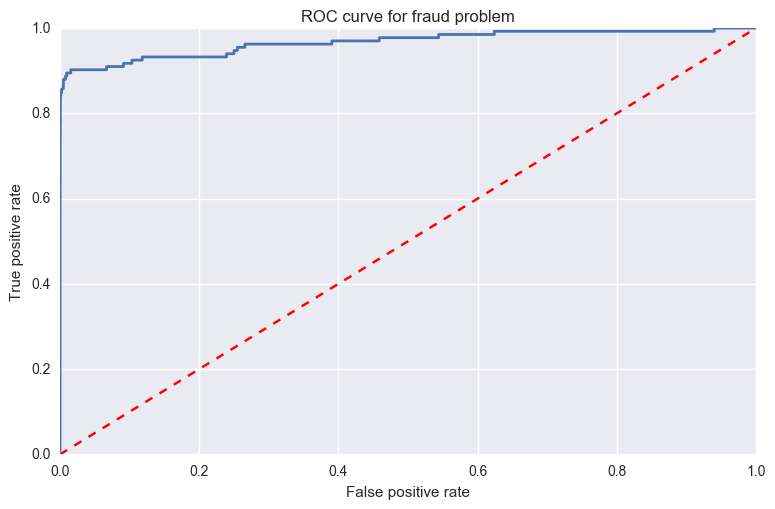

In [99]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='r',ls='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test)[:,1]))